# Anime Recommender System Project

## Importing Packages

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data Collection & Description

In [7]:
# Anime.csv, test.csv, and submission.csv are in the GitHub repo:
# https://github.com/Annette0907/UnsupervisedLearningProject

# train.csv is located locally at:
# C:\Users\annet\Documents\Unsupervised_Learning

# Data Summary:
# anime.csv: Anime details (ID, name, genre, type, etc.)
# train.csv: User-anime rating data
# test.csv: Pairs to predict ratings for
# submission.csv: Expected prediction format

## Loading the Data

In [8]:
anime = pd.read_csv('https://raw.githubusercontent.com/Annette0907/UnsupervisedLearningProject/main/anime.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Annette0907/UnsupervisedLearningProject/main/test.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/Annette0907/UnsupervisedLearningProject/main/submission.csv')
train = pd.read_csv('C:/Users/annet/Documents/Unsupervised_Learning/train.csv')

anime.head(10)
train.head(10)
test.head(10)

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111
5,31109,2144
6,20474,31790
7,60432,245
8,21853,934
9,53474,2104


## Data Cleaning & Filtering

In [9]:
train = train[train['rating'] != -1]
merged = pd.merge(train, anime, on='anime_id', how='left')
merged['genre'] = merged['genre'].fillna('Unknown')
merged['episodes'] = pd.to_numeric(merged['episodes'], errors='coerce').fillna(0)
merged['rating_y'] = merged['rating_y'].fillna(merged['rating_y'].mean())

## Exploratory Data Analysis

c:\ProgramData\anaconda3New\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


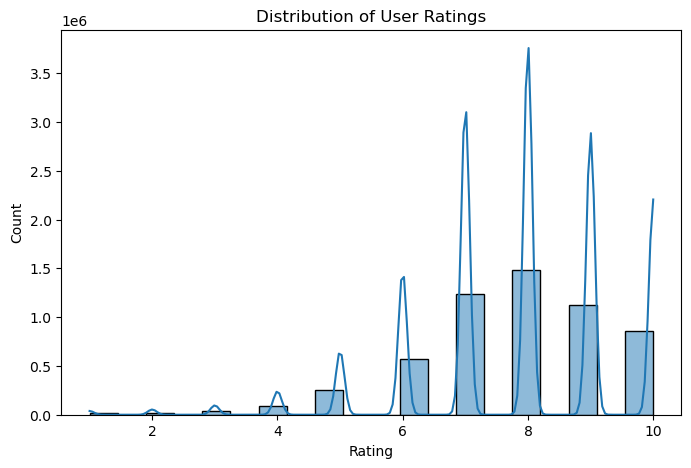

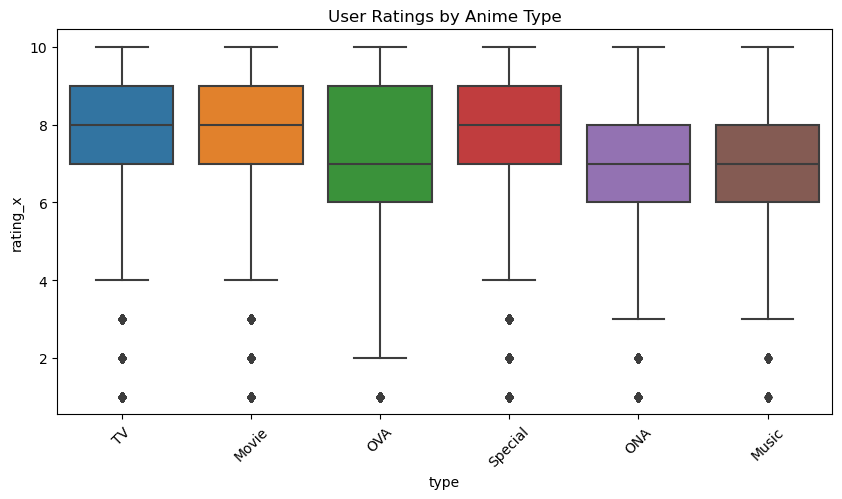

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(merged['rating_x'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=merged, x='type', y='rating_x')
plt.title('User Ratings by Anime Type')
plt.xticks(rotation=45)
plt.show()

## Modelling

### Content-Based Filtering using Genre

In [12]:
anime['genre'] = anime['genre'].fillna('')
genre_matrix = anime['genre'].str.get_dummies(sep=', ')
similarity_matrix = cosine_similarity(genre_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=anime['anime_id'], columns=anime['anime_id'])

## Evaluation & Validation

### I did simple train-test split RMSE

In [13]:
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)

# Mean rating as baseline
mean_rating = train_df['rating'].mean()
baseline_preds = [mean_rating] * len(val_df)

rmse = mean_squared_error(val_df['rating'], baseline_preds, squared=False)
print(f"Baseline RMSE (mean rating): {rmse:.4f}")

Baseline RMSE (mean rating): 1.5727
